# car-insurance-premium-predictor

The primary goal of this project is to develop a predictive model for car insurance prices. Using dummy data and various relevant features, the model aims to estimate the cost of car insurance for new data.

In [32]:
#import necessary libaries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

In [33]:
#load dataset
data = pd.read_csv('car_insurance_data.csv')
y = data.pop('AnnualPremium')
columns = data.columns.tolist()
print(f'data shape:{data.shape}')
#check for missing data
print(data.isnull().sum())
data.describe()
#show first 5 rows
data.head()

data shape:(39, 14)
Age                          0
Gender                       0
MaritalStatus                0
Occupation                   0
CarMake                      0
CarModel                     0
YearOfManufacture            0
VehicleValue                 0
AnnualMileage                0
DrivingExperience            0
NumberOfClaims               0
NumberOfTrafficViolations    0
CoverageType                 0
Location                     0
dtype: int64


,Age,Gender,MaritalStatus,Occupation,CarMake,CarModel,YearOfManufacture,VehicleValue,AnnualMileage,DrivingExperience,NumberOfClaims,NumberOfTrafficViolations,CoverageType,Location
0,25,Male,Single,Engineer,Ford,Fiesta,2018,15000,12000,7,1,0,Comprehensive,London
1,34,Female,Married,Teacher,Toyota,Corolla,2015,12000,10000,10,0,1,Third-Party,Manchester
2,45,Male,Married,Accountant,BMW,3 Series,2019,30000,8000,20,2,0,Comprehensive,Birmingham
3,29,Female,Single,Doctor,Honda,Civic,2020,18000,15000,8,1,2,Comprehensive,Leeds
4,40,Male,Married,Manager,Mercedes,C Class,2016,35000,7000,22,0,0,Comprehensive,Glasgow


## Data pre-processing

In [34]:
#label encoding
cols_to_encode = ['Gender','MaritalStatus','Occupation','CarMake','CarModel','CoverageType','Location']
for col in cols_to_encode:
    label_encoder = LabelEncoder()
    data[col] = label_encoder.fit_transform(data[col])

print(data.head())

#scale the features
mu = np.mean(data,axis = 0)
std = np.std(data,axis = 0)

data = (data - mu)/std
# check peak to peak range
np.ptp(data,axis = 0)

   Age  Gender  MaritalStatus  Occupation  CarMake  CarModel  \
0   25       1              1          11        5        19   
1   34       0              0          33       24        16   
2   45       1              0           0        1         2   
3   29       0              1           8        6        13   
4   40       1              0          20       13        10   

   YearOfManufacture  VehicleValue  AnnualMileage  DrivingExperience  \
0               2018         15000          12000                  7   
1               2015         12000          10000                 10   
2               2019         30000           8000                 20   
3               2020         18000          15000                  8   
4               2016         35000           7000                 22   

   NumberOfClaims  NumberOfTrafficViolations  CoverageType  Location  
0               1                          0             0         7  
1               0                       

Age                          3.950476
Gender                       2.000658
MaritalStatus                2.005944
Occupation                   3.275162
CarMake                      3.305897
CarModel                     3.407246
YearOfManufacture            4.007071
VehicleValue                 4.507503
AnnualMileage                4.996306
DrivingExperience            3.907002
NumberOfClaims               3.741247
NumberOfTrafficViolations    3.055757
CoverageType                 2.290159
Location                     3.458800
dtype: float64

14
[[<Axes: > <Axes: >]
 [<Axes: > <Axes: >]
 [<Axes: > <Axes: >]
 [<Axes: > <Axes: >]
 [<Axes: > <Axes: >]
 [<Axes: > <Axes: >]
 [<Axes: > <Axes: >]]


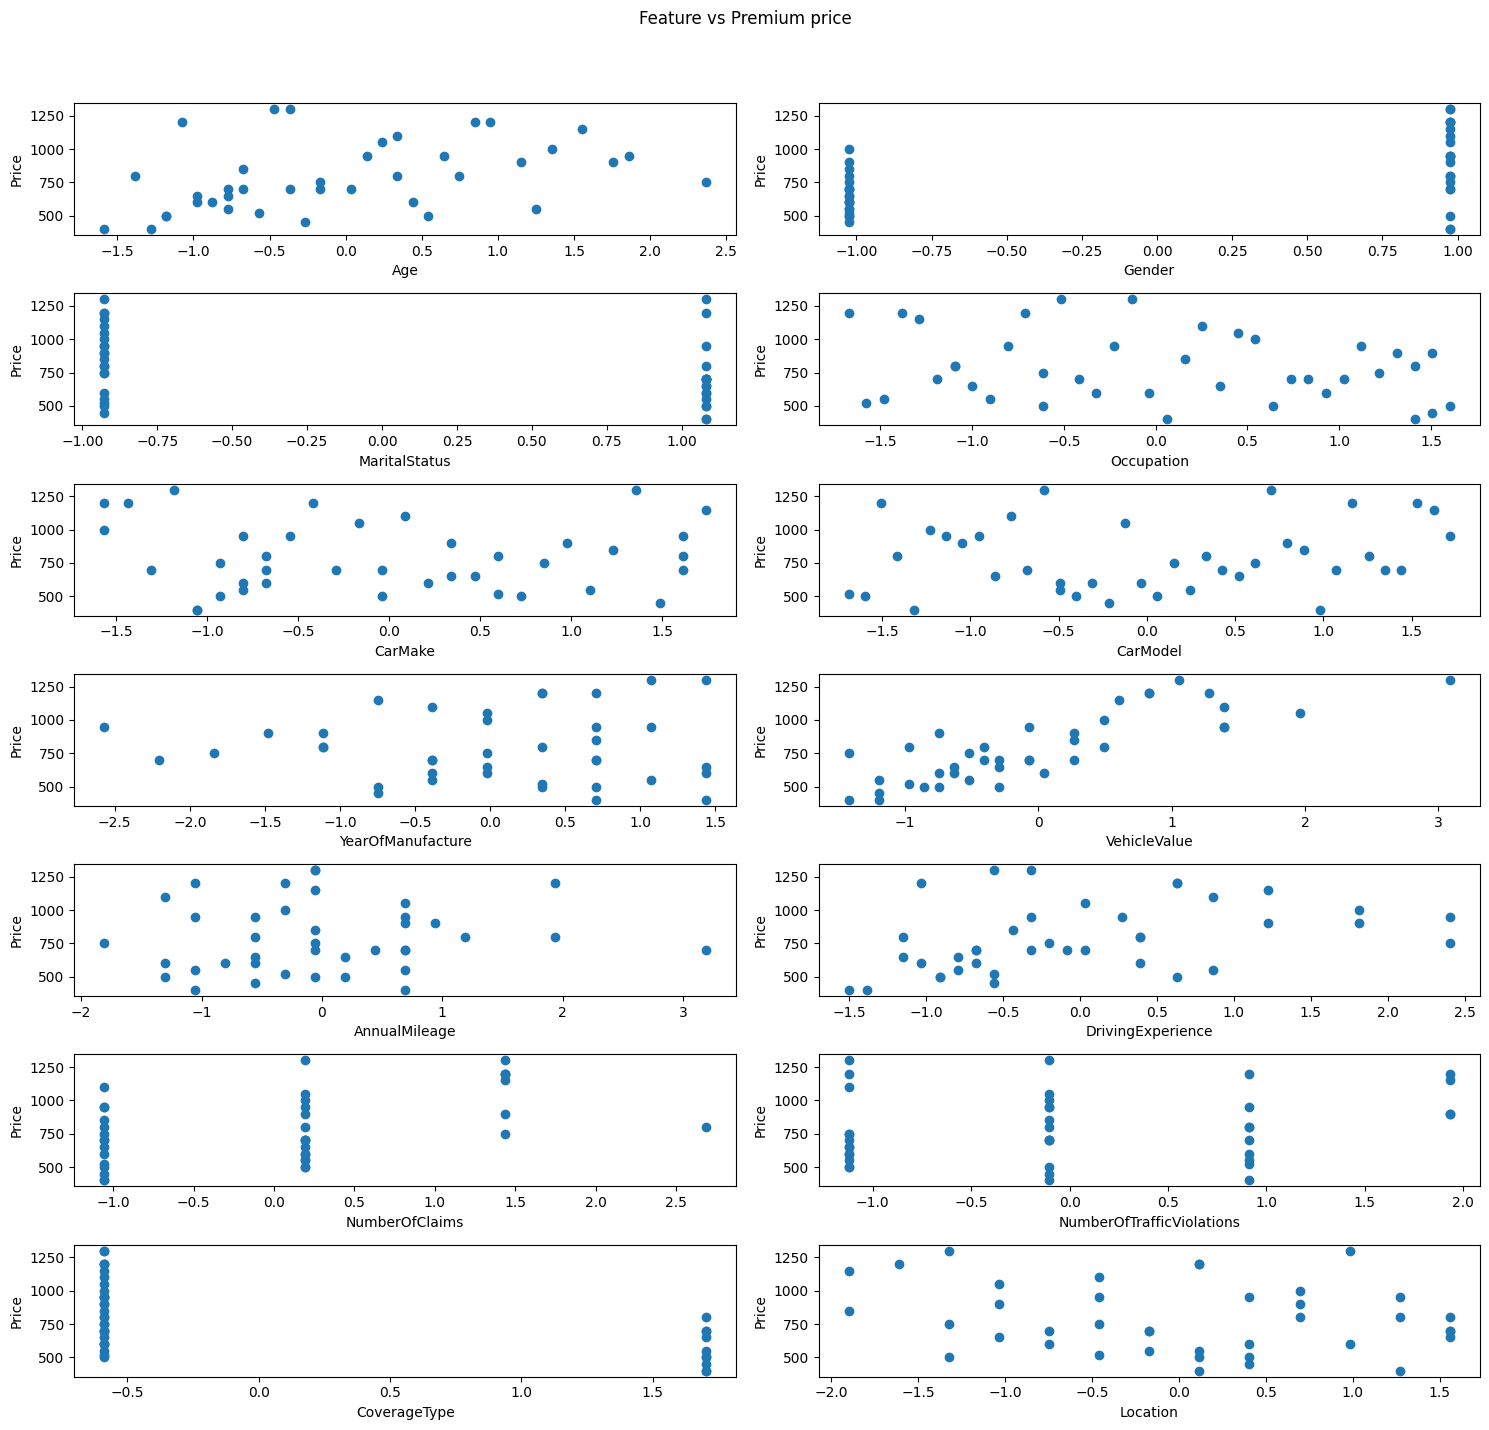

In [35]:
#Visualise data
m,n = data.shape
print(n)
figure,rows_of_tables = plt.subplots(7,2,figsize = (15,15))
figure.suptitle('Feature vs Premium price')
print(rows_of_tables)
i = 0

for row in rows_of_tables:
    for axis in row:
        axis.scatter(data.iloc[:,i],y)
        axis.set_ylabel('Price')
        axis.set_xlabel(columns[i])
        i+=1
        
    
plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Adjust layout



In [36]:
#mean squared error cost function
def cost_function(x,y,w,b):
    cost = 0
    for i in range(x.shape[0]):
        f_wb = np.dot(x.iloc[i],w) + b
        error = (f_wb-y[i])**2
        cost+=error
    cost = (cost/2*m)

    return cost

In [37]:
def compute_gradient(x,y,w,b):
    dwb_w = np.zeros(x.shape[1])
    dwb_b = 0
    
    for i in range(x.shape[0]):
        f_wb = np.dot(x.iloc[i],w) + b
        error = (f_wb-y[i])
        for j in range(len(dwb_w)):
            dwb_w[j] = dwb_w[j] + (error*x.iloc[i,j])
            
        dwb_b += error

    dwb_w = dwb_w/m
    dwb_b = dwb_b/m

    return dwb_w,dwb_b
        

In [38]:
def gradient_descent(x,y,w,b,alpha,iters):

    w_i = w
    b_i = b
    j_hist = []
    for i in range(iters):
        dwb_w,dwb_b = compute_gradient(x,y,w_i,b_i)
        w_i = w_i - (alpha * dwb_w)
        b_i = b_i - (alpha * dwb_b)

        if i < 1000000:
            j_hist.append(cost_function(x,y,w_i,b_i))
        if i%100 == 0 or i<10:
            print(f'Iteration: {i}, Cost equals:{j_hist[-1]:.1e}')
                
    return w_i, b_i
        

In [39]:
w_init = np.zeros(data.shape[1])
b_init = 0
alpha_init = 0.1
w,b = gradient_descent(data,y,w_init,b_init,alpha_init,1000)


def predict(x,w,b):
    x = pd.DataFrame(x, columns=['Age', 'Gender', 'MaritalStatus', 'Occupation', 'CarMake', 'CarModel', 'YearOfManufacture', 'VehicleValue', 'AnnualMileage', 'DrivingExperience', 'NumberOfClaims', 'NumberOfTrafficViolations', 'CoverageType', 'Location']
)
    categorical_columns = ['Gender','MaritalStatus', 'Occupation', 'CarMake', 'CarModel', 'CoverageType', 'Location']
    for cols in categorical_columns:
        le = LabelEncoder()
        x[cols] = le.fit_transform(x[cols])
 
    x = x.to_numpy()
    
    x = x[0]
    x = (x - mu) / std
    f_wb = np.dot(x,w) + b
    return f_wb
    
print(f"Insurance Price Prediction: £{predict([[32,'Male','Married','Teacher','Toyota','Corolla',2002,1000,8000,7,1,0,'Third-Party','Birmingham']],w,b)}")


Iteration: 0, Cost equals:4.2e+08
Iteration: 1, Cost equals:3.4e+08
Iteration: 2, Cost equals:2.7e+08
Iteration: 3, Cost equals:2.2e+08
Iteration: 4, Cost equals:1.8e+08
Iteration: 5, Cost equals:1.4e+08
Iteration: 6, Cost equals:1.2e+08
Iteration: 7, Cost equals:9.7e+07
Iteration: 8, Cost equals:8.0e+07
Iteration: 9, Cost equals:6.6e+07
Iteration: 100, Cost equals:4.8e+06
Iteration: 200, Cost equals:4.6e+06
Iteration: 300, Cost equals:4.5e+06
Iteration: 400, Cost equals:4.5e+06
Iteration: 500, Cost equals:4.5e+06
Iteration: 600, Cost equals:4.5e+06
Iteration: 700, Cost equals:4.4e+06
Iteration: 800, Cost equals:4.4e+06
Iteration: 900, Cost equals:4.4e+06
Insurance Price Prediction: £442.86657270900076


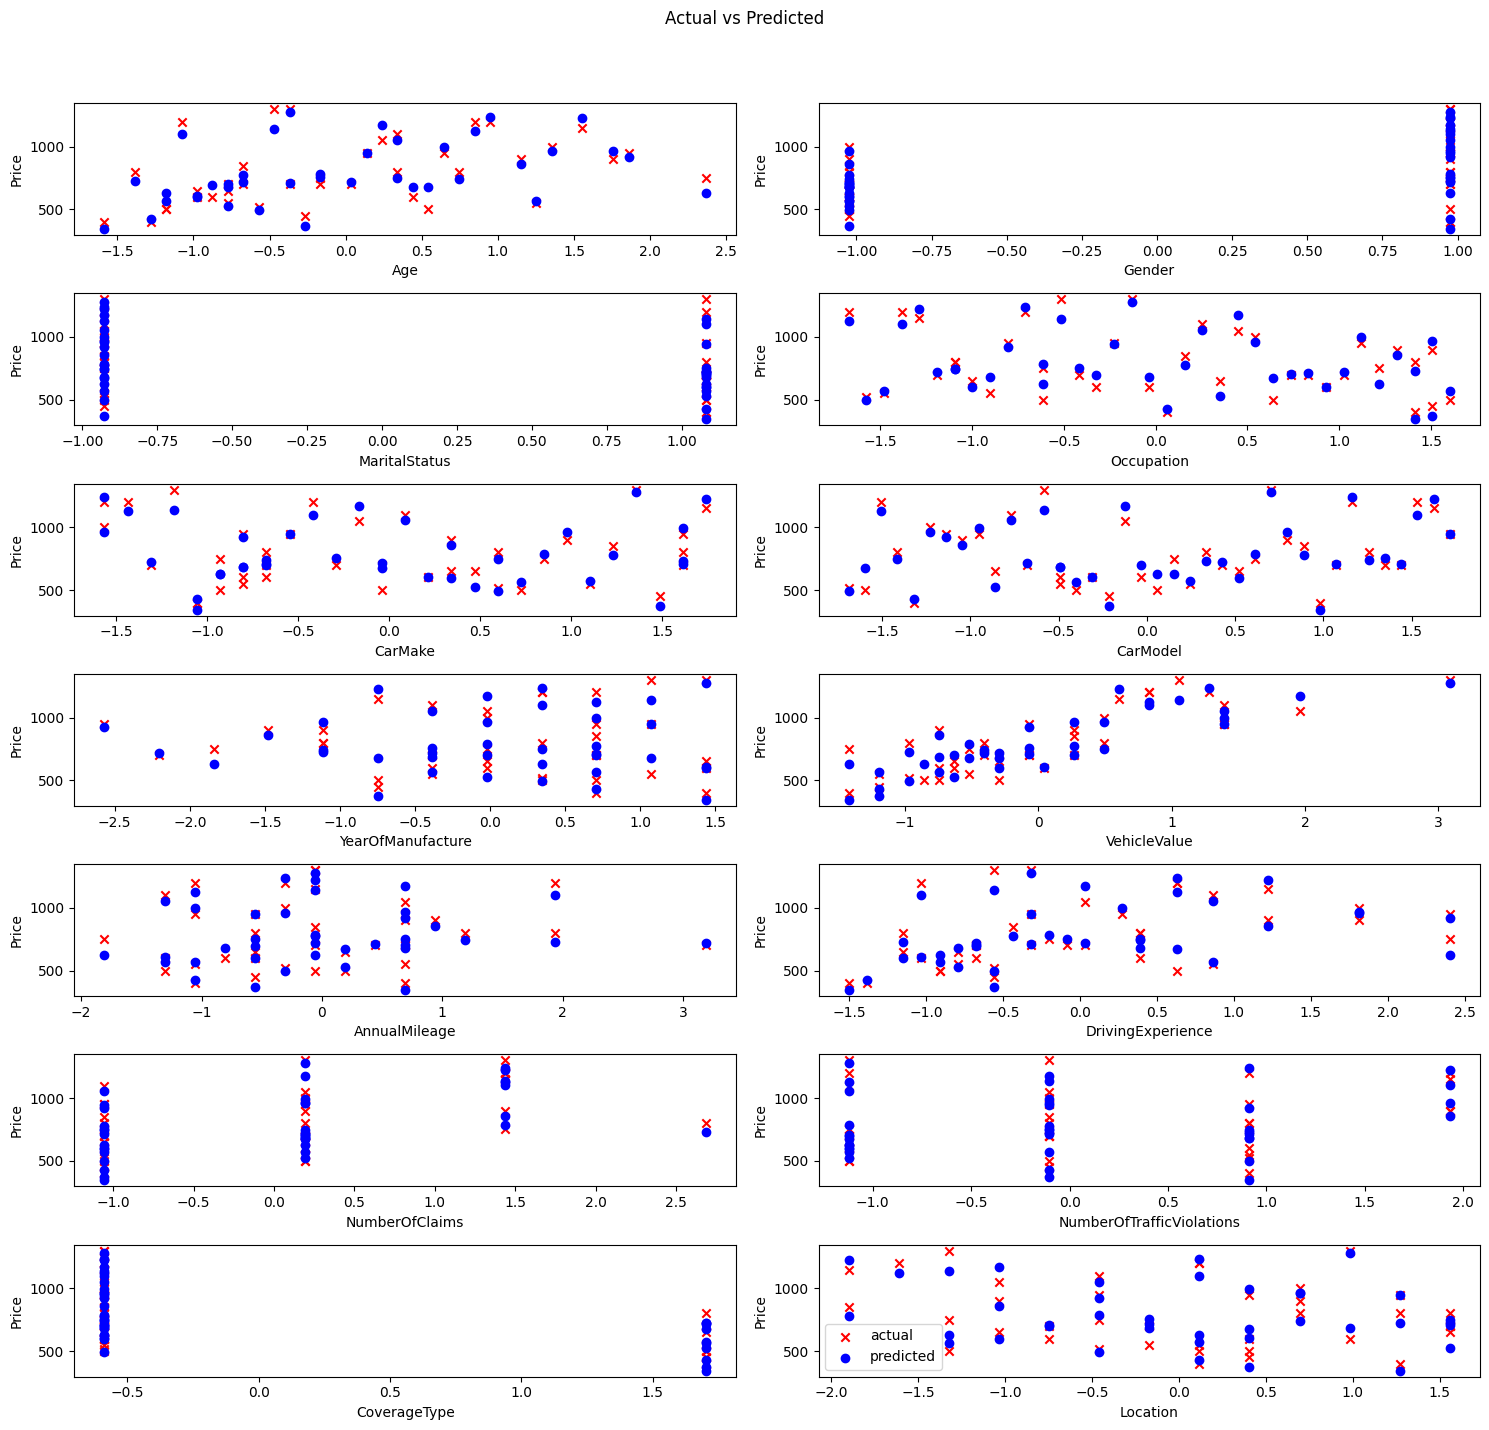

In [40]:
#visualise actual prices vs predicted prices from the model
    
m,n = data.shape

figure,rows_of_tables = plt.subplots(7,2,figsize = (15,15))
figure.suptitle('Actual vs Predicted')

i = 0


for row in rows_of_tables:
    for axis in row:
        axis.scatter(data.iloc[:,i],y,marker='x',c = 'red', label ='actual')
        axis.scatter(data.iloc[:,i],np.dot(data.iloc[:],w) + b,marker='o',c = 'blue', label ='predicted')
        
        axis.set_ylabel('Price')
        axis.set_xlabel(columns[i])
        i+=1
plt.legend()
    
plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Adjust layout
